# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [237]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]

In [242]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.linspace(0,T,num_steps+1)
    print(tt)
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


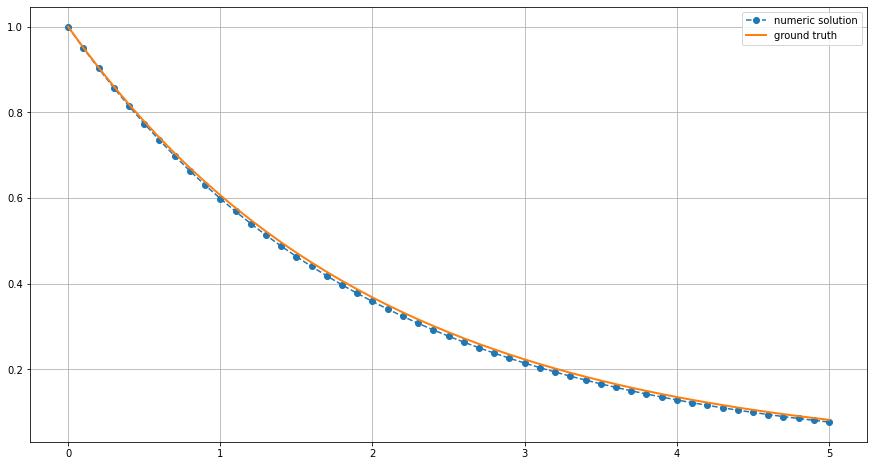

In [243]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

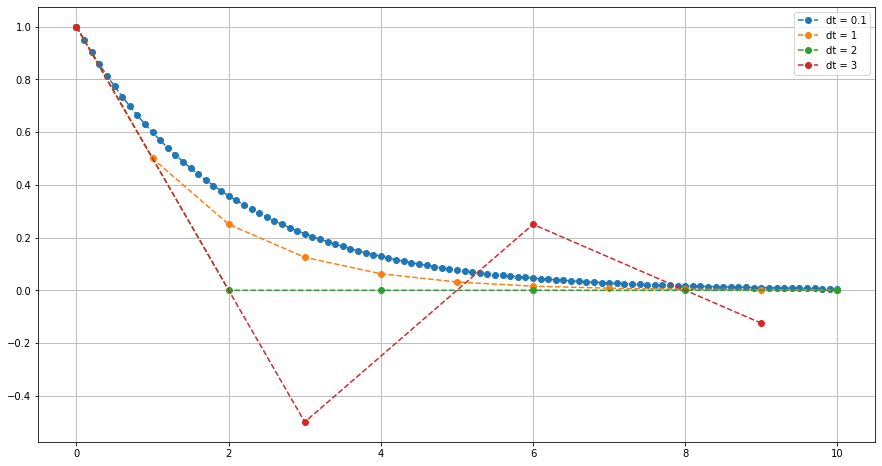

In [44]:
lam = -0.5
for dt in [0.1, 1, 2, 3]:
    tt, y = euler_solve(lam, 1.0, 10, dt)
    plt.plot(tt, y, 'o--', label='dt = %s' % dt)
plt.legend()
plt.grid()
plt.show()

We can clearly see that for $\tau$ > 1 our function moves further from the ground truth.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes.
(10% of the grade)

In [45]:
def euler_implicit(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt * lam)
    return tt, y

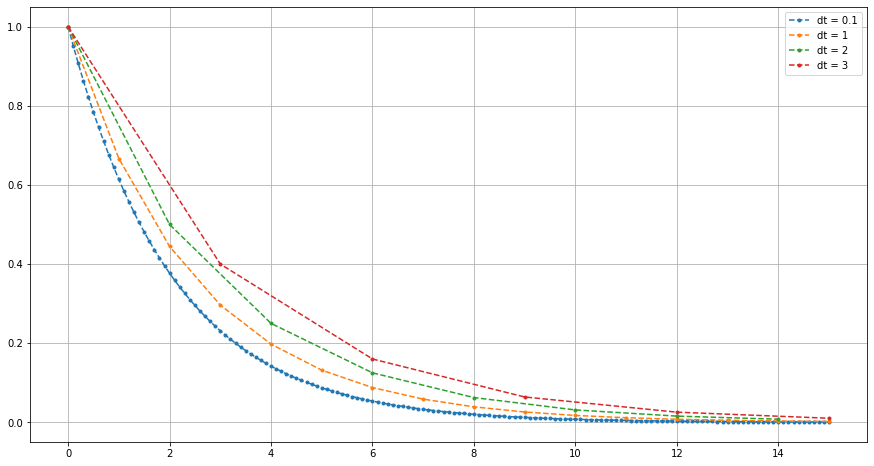

In [244]:
lam = -0.5
for dt in [0.1, 1, 2, 3]:
    tt, y = euler_implicit(lam, 1.0, 15, dt)
    plt.plot(tt, y, '.--', label='dt = %s' % dt)
plt.legend()
plt.grid()
plt.show()

Comparing two schemes we can see that implicit scheme has better overall stability.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [90]:
def Euler_explicit(A, u0, T, dt):
    num_steps = int(T/dt)
    N = A.shape[0]
    tt = np.arange(num_steps+1)*dt
    yy = np.empty((N,num_steps+1))
    yy[:, 0] = u0[:]
    for k in range(num_steps):
        yy[:, k + 1] = yy[:, k] + dt * A @ yy[:, k]
    return tt, yy

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

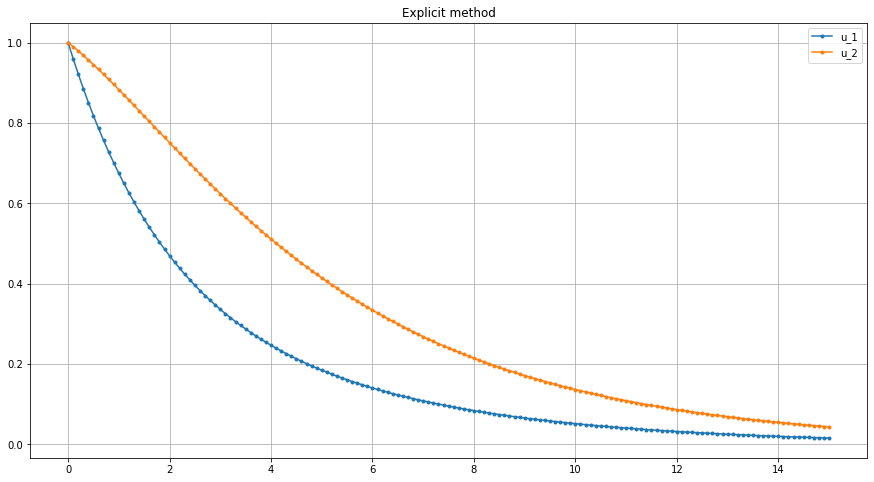

In [129]:
#let's test general Euler explicit scheme on random matrix to make sure that the function works properly
u0 = np.array([1,1],dtype=float)
A = np.array([[-0.5, 0.1],[0.2, -0.3]], dtype=float)
plt.title('Explicit method')
tt, yy = Euler_explicit(A, u0, 15, 0.1)
plt.plot(tt, yy[0], '.-', label='u_1')
plt.plot(tt, yy[1], '.-', label='u_2')
plt.grid()
plt.legend()
plt.show()

In [118]:
#now using matrix A from the task
u0 = np.array([1,0],dtype=float)
A = np.array([[-10, 10],[32, -499]], dtype=float)

Eigenvalues: [  -9.34647667 -499.65352333] 
s = 53.45902427704808


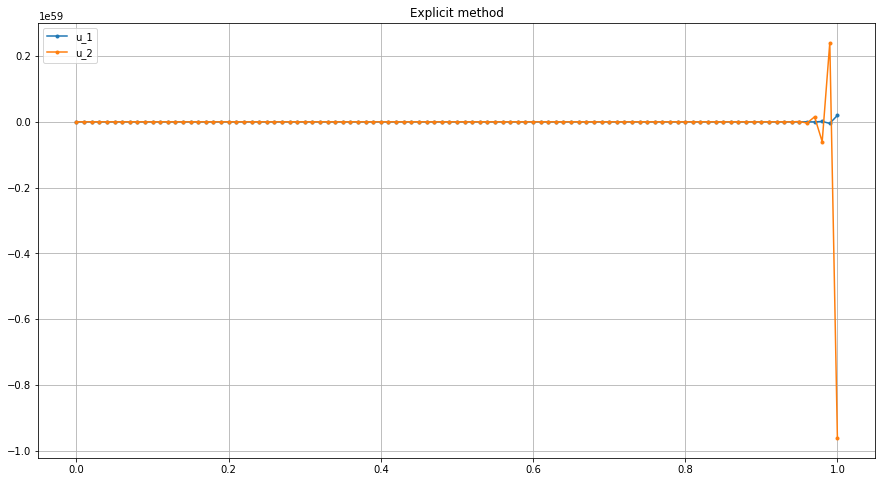

In [126]:
print("Eigenvalues:",np.linalg.eigvals(A),"\ns =",np.linalg.eigvals(A)[1]/np.linalg.eigvals(A)[0])
tt, yy = Euler_explicit(A, u0, 1, 0.01)
#The system is stiff 
plt.title('Explicit method')
plt.plot(tt, yy[0], '.-', label='u_1')
plt.plot(tt, yy[1], '.-', label='u_2')
plt.grid()
plt.legend()
plt.show()


The $s$ (or $\textit{stifness}$ parameter) is quite high therefore the system cannot be solved via explicit method.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [127]:
def Euler_implicit(A, u0, T, dt):
    #y_n+1 = y_n + dt*A y_n+1 -> (E-dt*A)y_n+1 = y_n, let A = (E-dt*A) and b = y_n
    num_steps = int(T/dt)
    N = A.shape[0]
    E = np.eye(N)
    tt = np.arange(num_steps+1)*dt
    yy = np.empty((N,num_steps+1))
    yy[:, 0] = u0[:]
    for k in range(num_steps):
        yy[:, k + 1] = np.linalg.solve(E - dt*A, yy[:, k])
    return tt, yy

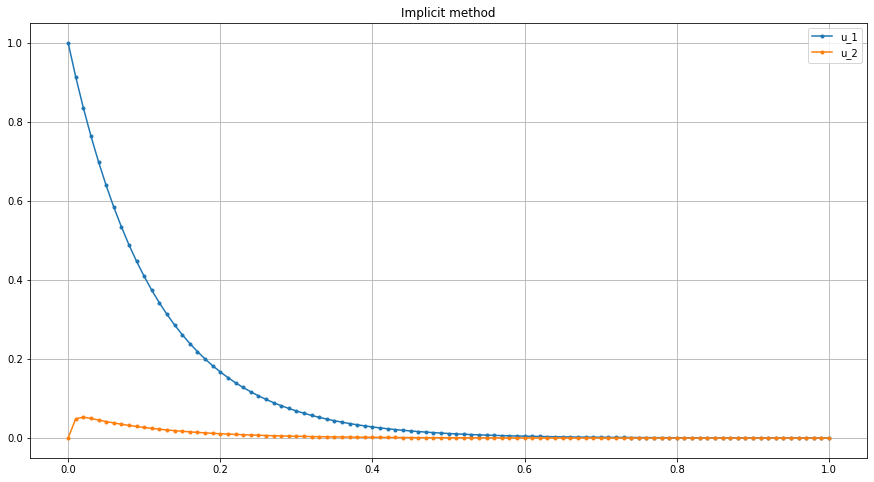

In [128]:
tt, yy = Euler_implicit(A, u0, 1, 0.01)
plt.title('Implicit method')
plt.plot(tt, yy[0], '.-', label='u_1')
plt.plot(tt, yy[1], '.-', label='u_2')
plt.grid()
plt.legend()
plt.show()

The difference in solutions is colossal, which proves that implicit method is more stable.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

Define $\dot{u} = w$
$$
\begin{pmatrix}
\dot{u} \\
\dot{w}\\
\end{pmatrix}
=
\begin{pmatrix}
w \\
-\omega^2 u\\
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0\\
\end{pmatrix}
*
\begin{pmatrix}
u \\
w \\
\end{pmatrix}
$$
### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

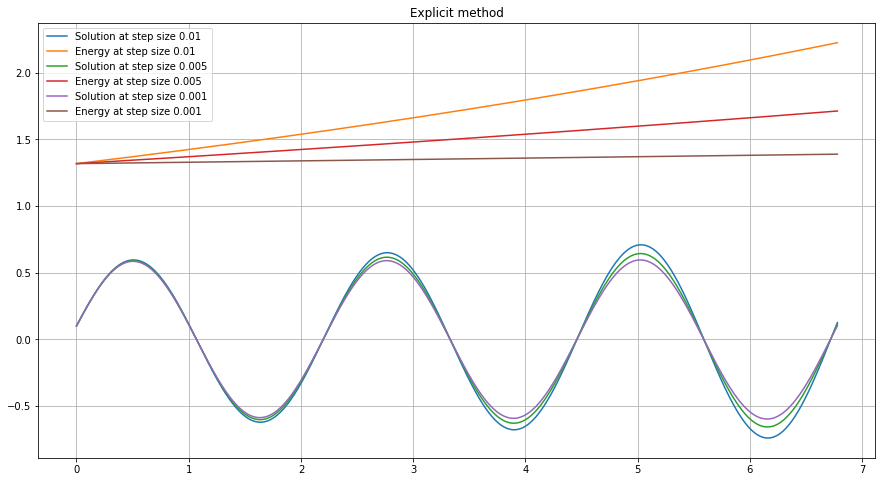

In [192]:
w = 2.78
T = 2*np.pi/w
u0 = np.array([0.1, 1.6],dtype=float)
A = np.array([[0, 1],[-w*w, 0]], dtype=float)
for dt in [0.01, 0.005, 0.001]:
    tt, yy = Euler_explicit(A, u0, 3*T, dt)
    plt.title('Explicit method')
    plt.plot(tt, yy[0], label='Solution at step size %s' % dt)
    plt.plot(tt, yy[1]**2/2+yy[0]**2*w**2/2, label='Energy at step size %s' % dt)
plt.grid()
plt.legend()
plt.show()

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [205]:
def RK_scheme(A, u0, T, dt):
    y_half = np.empty_like(u0)
    num_steps = int(T/dt)
    N = A.shape[0]
    tt = np.arange(num_steps+1)*dt
    yy = np.empty((N,num_steps+1))
    yy[:, 0] = u0[:]
    for k in range(num_steps): 
        y_half[:] = yy[:, k] + dt / 2 * A @ yy[:, k]
        yy[:, k + 1] = yy[:, k] + dt * A @ y_half[:]
    return tt, yy

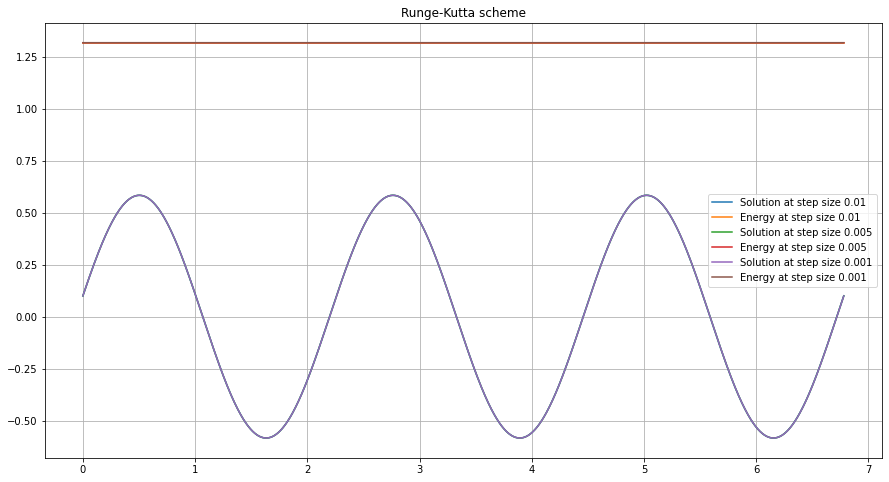

In [228]:
w = 2.78
T = 2*np.pi/w
u0 = np.array([0.1, 1.6],dtype=float)
A = np.array([[0, 1],[-w*w, 0]], dtype=float)
for dt in [0.01, 0.005, 0.001]:
    tt, yy = RK_scheme(A, u0, 3*T, dt)
    plt.title('Runge-Kutta scheme')
    plt.plot(tt, yy[0], label='Solution at step size %s' % dt)
    plt.plot(tt, yy[1]**2/2+yy[0]**2*w**2/2, label='Energy at step size %s' % dt)
plt.grid()
plt.legend()
plt.show()

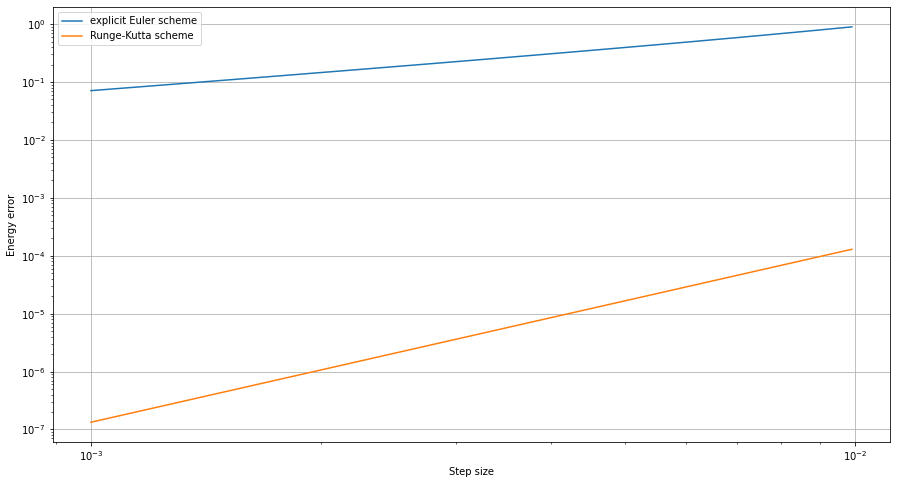

In [236]:
#comparing enegry errors produced by the RK method and the Euler's method at the same values of the time step
plt.yscale("log")
plt.xscale("log")
E = u0[1]**2/2 + w*w*u0[0]**2 / 2
Err = []
Err1 = []
DT = np.arange(10,100)/10000
for dt in DT:
    tt, yy = Euler_explicit(A, u0, 3*T, dt)
    ttt, yyy = RK_scheme(A, u0, 3*T, dt)
    Err_E = yy[1][-1]**2/2+yy[0][-1]**2*w**2/2
    Err_E1 = yyy[1][-1]**2/2+yyy[0][-1]**2*w**2/2
    Err.append(abs(Err_E - E))
    Err1.append(abs(Err_E1 - E))
plt.plot(DT,Err,label='explicit Euler scheme')
plt.plot(DT,Err1,label='Runge-Kutta scheme')
plt.xlabel('Step size')
plt.ylabel('Energy error')
plt.grid()
plt.legend()
plt.show()

Looking at the plot above we can check convergence rate and make sure that algorithms work correctly.